Twitter API with Tweepy

In [1]:
# import libraries
import tweepy # access the twitter API
import time # manipulate time values
import pandas as pd # data analysis and manipulation
from tqdm import tqdm, notebook # allow to output a smart progress bars or meters


In [2]:
# add authentifications
consumer_key = "NKBbA4tbMhL15WiVA0sLU91YJ"
consumer_secret = "1BWULZ8AEX8Lk4ZmzgcIMIi7pK3svXJQGqR2W3mkAMf6auESxc"
callback_uri = "oob"


In [3]:
# call Authentifications and grab redirect url
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url) # then click on the url to get the pin value


https://api.twitter.com/oauth/authorize?oauth_token=B4-6jgAAAAABRC6nAAABe5ldm8A


In [4]:
api = tweepy.API(auth, wait_on_rate_limit = True)


In [6]:
# answer with the pin value
user_pin_input = input("What is the pin value? ")


What is the pin value? 2715981


In [7]:
user_pin_input


'2715981'

In [8]:
# get access token
auth.get_access_token(user_pin_input)


('1371248311324323842-vBTnT5K4UWtNqEaLHFeER9KJdM4B9a',
 'J8HlI5Z1lMMSJ1rZjtGl745Gk2K2IhbEcz0PPVk6Q15RZ')

Twitter Sentiment Analysis

In [9]:
# pip install plotly
# pip install wordcloud
# pip install gensim
# import libraries

import pandas as pd
import numpy as np
from IPython.display import display

import re # support for regular expressions
import string


import nltk # natural language toolkit
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download("stopwords")
nltk.download("vader_lexicon")

from collections import Counter

import matplotlib.pyplot as plt
import plotly.express as pltx
import seaborn as sns

from wordcloud import WordCloud

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# load the dataset and display the first 10 rows
data = pd.read_csv("covid19_tweets_1.csv")
data.head(10)

user_name         user_location  \
0  Cheese Butty - UK Labour Party 'Starmer-harmer'  'Greater' Manchester   
1                                    China Economy               Beijing   
2                                       COVID News        Estados Unidos   
3                             Pune Vaccine Updater                   NaN   
4                                     Dr Kate 🌏🐀🌏🐀     Sydney, Australia   
5           Australian Retailers Association (ARA)             Australia   
6                                     Rohit Sharma        Washington, DC   
7                         Margie Hearron (she/her)      Mississippi, USA   
8  Cheese Butty - UK Labour Party 'Starmer-harmer'  'Greater' Manchester   
9                             FrontLine Compliance   Washington DC Metro   

                                    user_description         user_created  \
0  Misinformation 'unravelled'. Politics 'explain...  2011-07-16 09:31:56   
1  Latest business news and valuable information ...  2019-12-31 06:11:12   
2                                News about COVID-19  2013-06-05 08:52:31   
3  Follow us to get update as soon 18 plus vaccin...  2021-05-31 14:03:19   
4  Neurologist. Feminist. Advocate for humans, an...  2015-04-15 08:36:04   
5  The ARA is the retail industry’s largest and m...  2009-05-21 01:48:56   
6  Sen Journalist based in Washington D.C. for TV...  2009-04-29 05:22:25   
7  Stalk my profile, plz. I'm too busy to write e...  2010-01-17 21:52:23   
8  Misinformation 'unravelled'. Politics 'explain...  2011-07-16 09:31:56   
9  When the going gets tough we've got your Front...  2012-04-17 22:23:48   

   user_followers  user_friends  user_favourites  user_verified  \
0            3164           460           491200          False   
1            3023           147              535           True   
2            3273          1475              131          False   
3              92             0                0          False   
4            1920           881             2278          False   
5            2451          1529              723          False   
6            2205           842             6841           True   
7              59           108             8577          False   
8            3164           460           491200          False   
9             134           234              379          False   

                  date                                               text  \
0  2021-07-14 23:59:59  Wankers, #goebbels. #ToryScum #LowerThanVermin...   
1  2021-07-14 23:59:52  Over 1.4 bln doses of #COVID19 vaccines have b...   
2  2021-07-14 23:59:50  #WATCH More details are emerging about the new...   
3  2021-07-14 23:59:48  Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...   
4  2021-07-14 23:59:46  Perks of online learning - you get to show off...   
5  2021-07-14 23:59:16  VIC #COVID19 update: From 11.59pm on Wednesday...   
6  2021-07-14 23:58:58  .@TheDemocrats have called for a 9/11 style bi...   
7  2021-07-14 23:58:56  I don't think the red states will take the #De...   
8  2021-07-14 23:58:50  Your witness, #goebbels. #ToryScum #LowerThanV...   
9  2021-07-14 23:58:48  Compliance to adjust oversight practices with ...   

                                      hashtags               source  \
0  ['goebbels', 'ToryScum', 'LowerThanVermin']      Twitter Web App   
1                         ['COVID19', 'China']      Twitter Web App   
2                         ['WATCH', 'COVID19']    Revive Social App   
3                                          NaN       Vaccine finder   
4        ['learning', 'COVID19', 'COVID19Aus']   Twitter for iPhone   
5                                  ['COVID19']      Twitter Web App   
6                         ['COVID19', 'China']   Twitter for iPhone   
7                  ['DeltaVariant', 'COVID19']  Twitter for Android   
8  ['goebbels', 'ToryScum', 'LowerThanVermin']      Twitter Web App   
9                                          NaN      Twitter 

In [11]:
data.shape

(10506, 13)

In [12]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [13]:
# select important columns to perform the sentiment analysis
df = data[["user_name", "date", "text"]]
df.head(10)

user_name                 date  \
0  Cheese Butty - UK Labour Party 'Starmer-harmer'  2021-07-14 23:59:59   
1                                    China Economy  2021-07-14 23:59:52   
2                                       COVID News  2021-07-14 23:59:50   
3                             Pune Vaccine Updater  2021-07-14 23:59:48   
4                                     Dr Kate 🌏🐀🌏🐀  2021-07-14 23:59:46   
5           Australian Retailers Association (ARA)  2021-07-14 23:59:16   
6                                     Rohit Sharma  2021-07-14 23:58:58   
7                         Margie Hearron (she/her)  2021-07-14 23:58:56   
8  Cheese Butty - UK Labour Party 'Starmer-harmer'  2021-07-14 23:58:50   
9                             FrontLine Compliance  2021-07-14 23:58:48   

                                                text  
0  Wankers, #goebbels. #ToryScum #LowerThanVermin...  
1  Over 1.4 bln doses of #COVID19 vaccines have b...  
2  #WATCH More details are emerging about the new...  
3  Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...  
4  Perks of online learning - you get to show off...  
5  VIC #COVID19 update: From 11.59pm on Wednesday...  
6  .@TheDemocrats have called for a 9/11 style bi...  
7  I don't think the red states will take the #De...  
8  Your witness, #goebbels. #ToryScum #LowerThanV...  
9  Compliance to adjust oversight practices with ...

In [14]:
# doing suitables transformations of some columns
df.user_name=df.user_name.astype("category")
df.user_name=df.user_name.cat.codes # assign unique numerical codes to each category 
df.date=pd.to_datetime(df.date).dt.date

C:\Users\hp1\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df.head(10) # We will our new user name column as user id

user_name        date                                               text
0       1001  2021-07-14  Wankers, #goebbels. #ToryScum #LowerThanVermin...
1       1020  2021-07-14  Over 1.4 bln doses of #COVID19 vaccines have b...
2        857  2021-07-14  #WATCH More details are emerging about the new...
3       4311  2021-07-14  Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...
4       1527  2021-07-14  Perks of online learning - you get to show off...
5        527  2021-07-14  VIC #COVID19 update: From 11.59pm on Wednesday...
6       4550  2021-07-14  .@TheDemocrats have called for a 9/11 style bi...
7       3294  2021-07-14  I don't think the red states will take the #De...
8       1001  2021-07-14  Your witness, #goebbels. #ToryScum #LowerThanV...
9       1912  2021-07-14  Compliance to adjust oversight practices with ...

In [16]:
# select the tweets texts
tweets = df["text"]
tweets

0        Wankers, #goebbels. #ToryScum #LowerThanVermin...
1        Over 1.4 bln doses of #COVID19 vaccines have b...
2        #WATCH More details are emerging about the new...
3        Pin Code:[411001] \nPMC P Jehangir Hosp Sasoon...
4        Perks of online learning - you get to show off...
                               ...                        
10501    Nothing to see here people\nKeep consuming min...
10502    @BBCNews Interestingly BBC news reports Scotla...
10503    Racist #ToryHypocrisy \n#BorisHasFailedBritain...
10504    And this fuckhead could be President in 2024 #...
10505    Jammin til we all grab a jab on a 1994 Gibson ...
Name: text, Length: 10506, dtype: object

In [17]:
# text preprocessing
# tweets to lowercase, remove text in square brackets, remove url, remove punctuation and words containing numbers using regular expressions

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [18]:
# applying the clean text functions
clean_tweets = tweets.apply(clean_text)
clean_tweets.head(10)

0    wankers goebbels toryscum lowerthanvermin bbcn...
1    over  bln doses of  vaccines have been adminis...
2    watch more details are emerging about the new ...
3    pin code pmc p jehangir hosp sasoon rdvaccines...
4    perks of online learning  you get to show off ...
5    vic  update from  on wednesday  july masks hav...
6    thedemocrats have called for a  style bipartis...
7    i dont think the red states will take the delt...
8    your witness goebbels toryscum lowerthanvermin...
9    compliance to adjust oversight practices with ...
Name: text, dtype: object

In [19]:
# removing stopwords
stop_words = stopwords.words("english")
more_stopwords = ["u", "im", "c", "amp", "#coronavirus", "#coronavirusPandemic", "#covid19", "#covid_19", "covid19", "coronavirus"]
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = " ".join(word for word in text.split(" ") if word not in stop_words)
    return text

In [20]:
clean_tweets_wo_stopwords = clean_tweets.apply(remove_stopwords)
clean_tweets_wo_stopwords.head(10)

0    wankers goebbels toryscum lowerthanvermin bbcn...
1     bln doses  vaccines administered china july  ...
2    watch details emerging new digital  certificat...
3    pin code pmc p jehangir hosp sasoon rdvaccines...
4    perks online learning  get show pets 🐈‍⬛🥰learn...
5    vic  update  wednesday  july masks made mandat...
6    thedemocrats called  style bipartisan commissi...
7    dont think red states take deltavariant  serio...
8    witness goebbels toryscum lowerthanvermin bbcn...
9    compliance adjust oversight practices return o...
Name: text, dtype: object

In [21]:
# tokenization
def preprocessing_text(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
    no_punc = clean_text(text)
    tokenized_text = tokenizer.tokenize(no_punc)

    final_text = " ".join(tokenized_text)
    return final_text

In [22]:
# Applying the preprocessing function to data
clean_tweets_token_wo_stopwords  = clean_tweets_wo_stopwords.apply(str).apply(lambda x: preprocessing_text(x))
clean_tweets_token_wo_stopwords.head(10)

0    wankers goebbels toryscum lowerthanvermin bbcn...
1    bln doses vaccines administered china july cou...
2    watch details emerging new digital certificate...
3    pin code pmc p jehangir hosp sasoon rdvaccines...
4         perks online learning get show pets learning
5    vic update wednesday july masks made mandatory...
6    thedemocrats called style bipartisan commissio...
7    dont think red states take deltavariant seriou...
8    witness goebbels toryscum lowerthanvermin bbcn...
9    compliance adjust oversight practices return o...
Name: text, dtype: object

In [23]:
# stemming
stemming = PorterStemmer()

def stemm_text(text):
    text = " ".join(stemming.stem(word) for word in text.split(" "))
    return text

In [24]:
# applying stemming function to data
clean_tweets_token_stem_wo_stopwords = clean_tweets_token_wo_stopwords.apply(stemm_text)
clean_tweets_token_stem_wo_stopwords.head(10)

0    wanker goebbel toryscum lowerthanvermin bbcnew...
1    bln dose vaccin administ china juli countri co...
2    watch detail emerg new digit certif use travel...
3    pin code pmc p jehangir hosp sasoon rdvaccin c...
4                  perk onlin learn get show pet learn
5    vic updat wednesday juli mask made mandatori i...
6    thedemocrat call style bipartisan commiss inve...
7    dont think red state take deltavari serious ch...
8    wit goebbel toryscum lowerthanvermin bbcnew bb...
9    complianc adjust oversight practic return offi...
Name: text, dtype: object

In [25]:
# list of words of all the tweets
words_list = [word for line in clean_tweets_token_stem_wo_stopwords
              for word in line.split()]
words_list[:10]

['wanker',
 'goebbel',
 'toryscum',
 'lowerthanvermin',
 'bbcnew',
 'bbcnewsnight',
 'bbcpolit',
 'bbcworldaton',
 'bbcpm',
 'racist']

In [26]:
# create a word counts dataframe and plot the most common words
words_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(words_counts)
words_df.columns = ["words","frq"]
display(words_df.head(10))
# px = import plotly.express
pltx.bar(words_df, x = "words", y = "frq", title = "Most common words")

words   frq
0  vaccin  2760
1   capac  2062
2    case  1525
3   peopl  1207
4     age  1160
5   avail  1142
6   limit  1053
7    pune  1046
8    code  1045
9   cowin  1045

In [27]:
# Add the cleaned tweets to the main dataframe
df["text"] = clean_tweets_token_stem_wo_stopwords
display(df.head(10))

<ipython-input-27-abef9380ce28>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



user_name        date                                               text
0       1001  2021-07-14  wanker goebbel toryscum lowerthanvermin bbcnew...
1       1020  2021-07-14  bln dose vaccin administ china juli countri co...
2        857  2021-07-14  watch detail emerg new digit certif use travel...
3       4311  2021-07-14  pin code pmc p jehangir hosp sasoon rdvaccin c...
4       1527  2021-07-14                perk onlin learn get show pet learn
5        527  2021-07-14  vic updat wednesday juli mask made mandatori i...
6       4550  2021-07-14  thedemocrat call style bipartisan commiss inve...
7       3294  2021-07-14  dont think red state take deltavari serious ch...
8       1001  2021-07-14  wit goebbel toryscum lowerthanvermin bbcnew bb...
9       1912  2021-07-14  complianc adjust oversight practic return offi...

In [28]:
# polarity scores of each tweet
method = SentimentIntensityAnalyzer()
pol_scores = lambda x:method.polarity_scores(x)
sentiment_scores = df.text.apply(pol_scores)
sentiment_scores

0        {'neg': 0.497, 'neu': 0.503, 'pos': 0.0, 'comp...
1        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                               ...                        
10501    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10502    {'neg': 0.276, 'neu': 0.53, 'pos': 0.194, 'com...
10503    {'neg': 0.618, 'neu': 0.382, 'pos': 0.0, 'comp...
10504    {'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp...
10505    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, Length: 10506, dtype: object

In [29]:
# rewrite the sentiment_scores as a dataframe
sentiment_scores_df = pd.DataFrame(data = list(sentiment_scores))
display(sentiment_scores_df)

neg    neu    pos  compound
0      0.497  0.503  0.000   -0.9501
1      0.000  1.000  0.000    0.0000
2      0.000  1.000  0.000    0.0000
3      0.000  1.000  0.000    0.0000
4      0.000  1.000  0.000    0.0000
...      ...    ...    ...       ...
10501  0.000  1.000  0.000    0.0000
10502  0.276  0.530  0.194   -0.5106
10503  0.618  0.382  0.000   -0.8442
10504  0.577  0.423  0.000   -0.6249
10505  0.000  1.000  0.000    0.0000

[10506 rows x 4 columns]

In [30]:
# labelize the sentiment scores dataframe based on the compound polarity value
def labelize(x):
  if x == 0:
    return "neutral"
  else:
    return ("positive" if x > 0 else "negative")

In [31]:
# applying the labelize function to the data
sentiment_scores_df["label"] = sentiment_scores_df.compound.apply(labelize)
display(sentiment_scores_df.head(10))

neg    neu  pos  compound     label
0  0.497  0.503  0.0   -0.9501  negative
1  0.000  1.000  0.0    0.0000   neutral
2  0.000  1.000  0.0    0.0000   neutral
3  0.000  1.000  0.0    0.0000   neutral
4  0.000  1.000  0.0    0.0000   neutral
5  0.081  0.919  0.0   -0.2960  negative
6  0.000  1.000  0.0    0.0000   neutral
7  0.357  0.643  0.0   -0.8137  negative
8  0.420  0.580  0.0   -0.9231  negative
9  0.000  1.000  0.0    0.0000   neutral

In [32]:
# Joining the two dataframes
final_covid_data = df.join(sentiment_scores_df.label)
display(final_covid_data.head(10))

user_name        date                                               text  \
0       1001  2021-07-14  wanker goebbel toryscum lowerthanvermin bbcnew...   
1       1020  2021-07-14  bln dose vaccin administ china juli countri co...   
2        857  2021-07-14  watch detail emerg new digit certif use travel...   
3       4311  2021-07-14  pin code pmc p jehangir hosp sasoon rdvaccin c...   
4       1527  2021-07-14                perk onlin learn get show pet learn   
5        527  2021-07-14  vic updat wednesday juli mask made mandatori i...   
6       4550  2021-07-14  thedemocrat call style bipartisan commiss inve...   
7       3294  2021-07-14  dont think red state take deltavari serious ch...   
8       1001  2021-07-14  wit goebbel toryscum lowerthanvermin bbcnew bb...   
9       1912  2021-07-14  complianc adjust oversight practic return offi...   

      label  
0  negative  
1   neutral  
2   neutral  
3   neutral  
4   neutral  
5  negative  
6   neutral  
7  negative  
8  negative  
9   neutral

In [33]:
# plotting the sentiment scores
counts_df = final_covid_data.label.value_counts().reset_index()
display(counts_df)

index  label
0   neutral   4029
1  negative   3243
2  positive   3234

<AxesSubplot:xlabel='index', ylabel='label'>

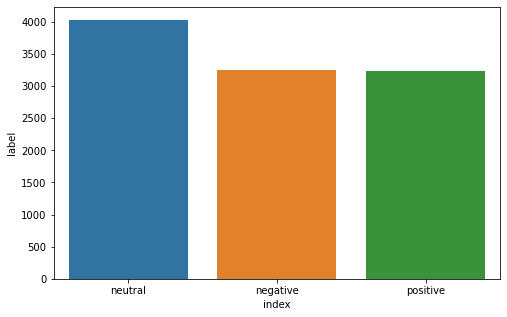

In [34]:
plt.figure(figsize = (8,5)) 
sns.barplot(x = "index", y = "label", data = counts_df)

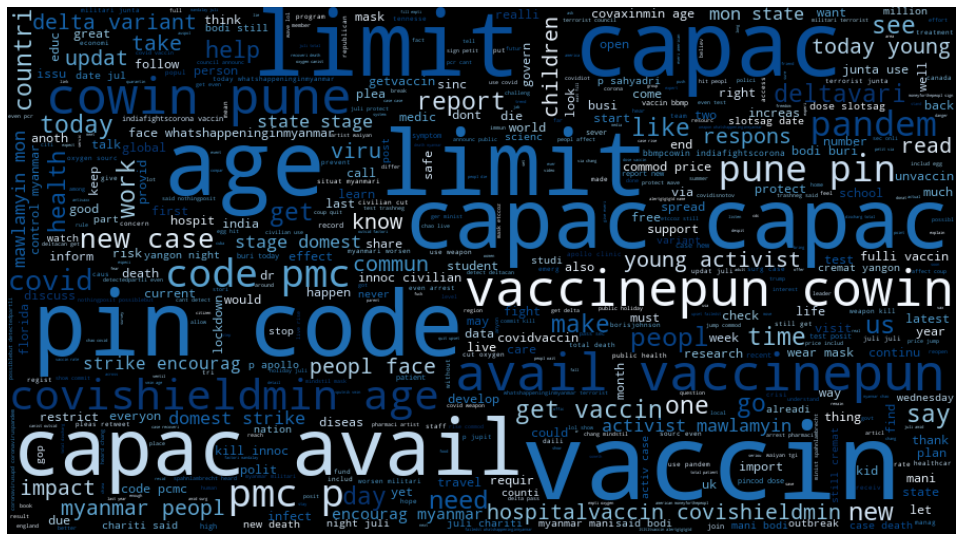

In [35]:
# Display top words in tweets with word cloud
text = " ".join(final_covid_data.text)
WC = WordCloud(width = 900,
               height = 500,
               stopwords = set(stop_words),
               max_words = 500,
               max_font_size = 100,
               relative_scaling = 0.5,
               colormap = "Blues",
               random_state=1).generate(text)

fig = plt.figure(1, figsize=(17,14))
plt.axis('off')
fig.subplots_adjust(top=2.3)
plt.imshow(WC, interpolation = "bilinear")
plt.show()

In [36]:
# show the sentiment scores 
display(sentiment_scores_df)

neg    neu    pos  compound     label
0      0.497  0.503  0.000   -0.9501  negative
1      0.000  1.000  0.000    0.0000   neutral
2      0.000  1.000  0.000    0.0000   neutral
3      0.000  1.000  0.000    0.0000   neutral
4      0.000  1.000  0.000    0.0000   neutral
...      ...    ...    ...       ...       ...
10501  0.000  1.000  0.000    0.0000   neutral
10502  0.276  0.530  0.194   -0.5106  negative
10503  0.618  0.382  0.000   -0.8442  negative
10504  0.577  0.423  0.000   -0.6249  negative
10505  0.000  1.000  0.000    0.0000   neutral

[10506 rows x 5 columns]

In [37]:
# add the sentiment scores to the final covid dataframe
final_covid_data_df = final_covid_data.join(sentiment_scores_df.compound)
display(final_covid_data_df)

user_name        date  \
0           1001  2021-07-14   
1           1020  2021-07-14   
2            857  2021-07-14   
3           4311  2021-07-14   
4           1527  2021-07-14   
...          ...         ...   
10501       5191  2021-07-14   
10502        103  2021-07-14   
10503       4759  2021-07-14   
10504       2677  2021-07-14   
10505       3849  2021-07-14   

                                                    text     label  compound  
0      wanker goebbel toryscum lowerthanvermin bbcnew...  negative   -0.9501  
1      bln dose vaccin administ china juli countri co...   neutral    0.0000  
2      watch detail emerg new digit certif use travel...   neutral    0.0000  
3      pin code pmc p jehangir hosp sasoon rdvaccin c...   neutral    0.0000  
4                    perk onlin learn get show pet learn   neutral    0.0000  
...                                                  ...       ...       ...  
10501                         noth see peoplekeep consum   neutral    0.0000  
10502  bbcnew interestingli bbc news report scotland ...  negative   -0.5106  
10503  racist toryhypocrisi borishasfailedbritain bre...  negative   -0.8442  
10504          fuckhead could presid gopseditioustraitor  negative   -0.6249  
10505  jammin til grab jab gibson le paul goldtop ear...   neutral    0.0000  

[10506 rows x 5 columns]

Building the Recommendation Engine

In [38]:
# rename the compound column to scores
final_covid_data_df.rename(columns = {"compound": "scores"})

user_name        date  \
0           1001  2021-07-14   
1           1020  2021-07-14   
2            857  2021-07-14   
3           4311  2021-07-14   
4           1527  2021-07-14   
...          ...         ...   
10501       5191  2021-07-14   
10502        103  2021-07-14   
10503       4759  2021-07-14   
10504       2677  2021-07-14   
10505       3849  2021-07-14   

                                                    text     label  scores  
0      wanker goebbel toryscum lowerthanvermin bbcnew...  negative -0.9501  
1      bln dose vaccin administ china juli countri co...   neutral  0.0000  
2      watch detail emerg new digit certif use travel...   neutral  0.0000  
3      pin code pmc p jehangir hosp sasoon rdvaccin c...   neutral  0.0000  
4                    perk onlin learn get show pet learn   neutral  0.0000  
...                                                  ...       ...     ...  
10501                         noth see peoplekeep consum   neutral  0.0000  
10502  bbcnew interestingli bbc news report scotland ...  negative -0.5106  
10503  racist toryhypocrisi borishasfailedbritain bre...  negative -0.8442  
10504          fuckhead could presid gopseditioustraitor  negative -0.6249  
10505  jammin til grab jab gibson le paul goldtop ear...   neutral  0.0000  

[10506 rows x 5 columns]

In [39]:
# build the tfidf matrix
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english', max_features=100)
tfidf_matrix = tf.fit_transform(final_covid_data_df['text'])

In [40]:
print("tfidf Matrix:", tfidf_matrix.toarray())

tfidf Matrix: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
# calculate the cosine similarities
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [42]:
cosine_similarities

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.20213087],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.20213087, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [43]:
results = {}

for idx, row in final_covid_data_df.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_users = [(cosine_similarities[idx][i], final_covid_data_df['user_name'][i]) for i in similar_indices]

    results[row['user_name']] = similar_users[1:]
    
print('done!')

done!


In [44]:
results

{1001: [(0.0, 1641),
  (0.0, 6046),
  (0.0, 1726),
  (0.0, 2441),
  (0.0, 298),
  (0.0, 660),
  (0.0, 1008),
  (0.0, 1523),
  (0.0, 4311),
  (0.0, 5344),
  (0.0, 5805),
  (0.0, 6333),
  (0.0, 2351),
  (0.0, 1552),
  (0.0, 6079),
  (0.0, 4166),
  (0.0, 1003),
  (0.0, 2131),
  (0.0, 4983),
  (0.0, 6260),
  (0.0, 1993),
  (0.0, 2739),
  (0.0, 6198),
  (0.0, 2981),
  (0.0, 160),
  (0.0, 2225),
  (0.0, 2313),
  (0.0, 6322),
  (0.0, 1198),
  (0.0, 3593),
  (0.0, 6336),
  (0.0, 1311),
  (0.0, 1495),
  (0.0, 5779),
  (0.0, 3768),
  (0.0, 4140),
  (0.0, 3027),
  (0.0, 2131),
  (0.0, 1470),
  (0.0, 4311),
  (0.0, 1851),
  (0.0, 4909),
  (0.0, 6265),
  (0.0, 4708),
  (0.0, 468),
  (0.0, 4246),
  (0.0, 1973),
  (0.0, 1796),
  (0.0, 5257),
  (0.0, 3538),
  (0.0, 952),
  (0.0, 492),
  (0.0, 777),
  (0.0, 5865),
  (0.0, 4124),
  (0.0, 5866),
  (0.0, 4286),
  (0.0, 777),
  (0.0, 777),
  (0.0, 777),
  (0.0, 6226),
  (0.0, 925),
  (0.0, 350),
  (0.0, 4641),
  (0.0, 1095),
  (0.0, 6226),
  (0.0, 3156),
 

In [45]:
def user(id):
    return final_covid_data_df.loc[final_covid_data_df['user_name'] == id]['text'].tolist()[0].split(' - ')[0]

In [46]:
# Just reads the results out of the dictionary.
def recommend(user_id, num):
    print("Recommending " + str(num) + " tweets similar to the user with the id" + str(user_id) + "...")
    print("-------")
    recs = results[user_id][:num]
    for rec in recs:
        print("Recommended: " + str(rec[1]) + " (score:" + str(rec[0]) + ")")

recommend(user_id=1020, num=10)

Recommending 10 tweets similar to the user with the id1020...
-------
Recommended: 2902 (score:0.6643114368256184)
Recommended: 6305 (score:0.6627787613983555)
Recommended: 5414 (score:0.6557696661468198)
Recommended: 2518 (score:0.6531591376843979)
Recommended: 1287 (score:0.6155968854116478)
Recommended: 501 (score:0.5907334140643661)
Recommended: 3300 (score:0.5907334140643661)
Recommended: 2712 (score:0.5907334140643661)
Recommended: 6413 (score:0.5907334140643661)
Recommended: 1028 (score:0.5907334140643661)


In [ ]:
# Source code:
# https://www.kaggle.com/chenxidong/sentiment-analysis-and-word-cloud
# https://www.kaggle.com/andreshg/nlp-glove-bert-tf-idf-lstm-explained
# https://www.kaggle.com/tamilsel/exploring-covid-19-tweets-and-sentiment-analysis
# https://pythonhealthcare.org/2018/12/14/101-pre-processing-data-tokenization-stemming-and-removal-of-stop-words/
# https://apprize.best/python/six/5.html
# https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb
# https://medium.com/mlearning-ai/nlp-tokenization-stemming-lemmatization-and-part-of-speech-tagging-9088ac068768
# https://docs.tweepy.org/en/latest/